<a href="https://colab.research.google.com/github/perezsam/DM19-Lab2-Homework/blob/master/lab2_take_home_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## 1. Data Preparation

### 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

Working on Google Colab, we start by mounting our google drive.

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/dm_hw2/data/semeval"

dev  train


Load dataset from drive

In [0]:
import pandas as pd

### training data
anger_train = pd.read_csv("/content/drive/My Drive/dm_hw2/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("/content/drive/My Drive/dm_hw2/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("/content/drive/My Drive/dm_hw2/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("/content/drive/My Drive/dm_hw2/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [0]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [6]:
### testing data
anger_test = pd.read_csv("/content/drive/My Drive/dm_hw2/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("/content/drive/My Drive/dm_hw2/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("/content/drive/My Drive/dm_hw2/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("/content/drive/My Drive/dm_hw2/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [0]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [8]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### **Exercise 1 (Take home):**  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


Rather than just getting the top 30 words in both datasets, I performed some simple text preprocessing to get more meaningful terms. After the text preprocessing, I proceed by plotting the top unigrams (most frequent words) and top bigrams in both training and testing dataset.

Text preprocessing include: 
- Remove punctuations
- Remove tags
- Remove special characters and digits
- Stemming
- Lemmatization 


In [9]:
# libraries for text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
## creating a list of stopword
stop_words = stopwords.words("english")

In [0]:
## function to perform some basic text preprocessing
def clean_text_corpus(data_df):
  corpus = []
  for (i, row) in enumerate(data_df.values):
  
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', row[1])

    #Convert to lowercase
    text = text.lower()

    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)

    corpus.append(text)
    
  return corpus

In [0]:
## clean text for both training and testing dataset using our function
train_corpus = clean_text_corpus(train_df)
test_corpus = clean_text_corpus(test_df)

Define our functions to obtain the top *n* unigrams and bigrams

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [0]:
# most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [0]:
# most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

Plot the top 30 unigrams and bigrams in our training dataset

Text(0.5, 1.0, 'Top 30 words in train dataset')

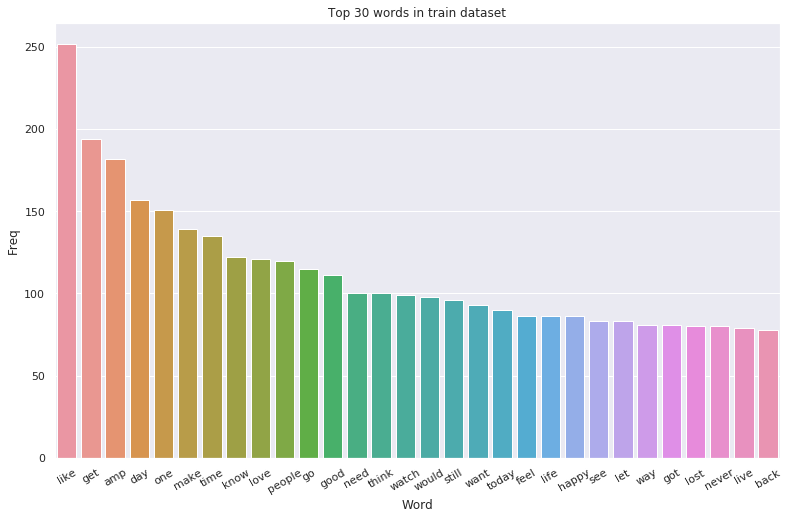

In [16]:
## plot the top 30 most freq words in train dataset
train_top_words = get_top_n_words(train_corpus, n=30)
train_top_df = pd.DataFrame(train_top_words)
train_top_df.columns=["Word", "Freq"]

# barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=train_top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set_title("Top 30 words in train dataset")

Text(0.5, 1.0, 'Top 30 bigrams in train dataset')

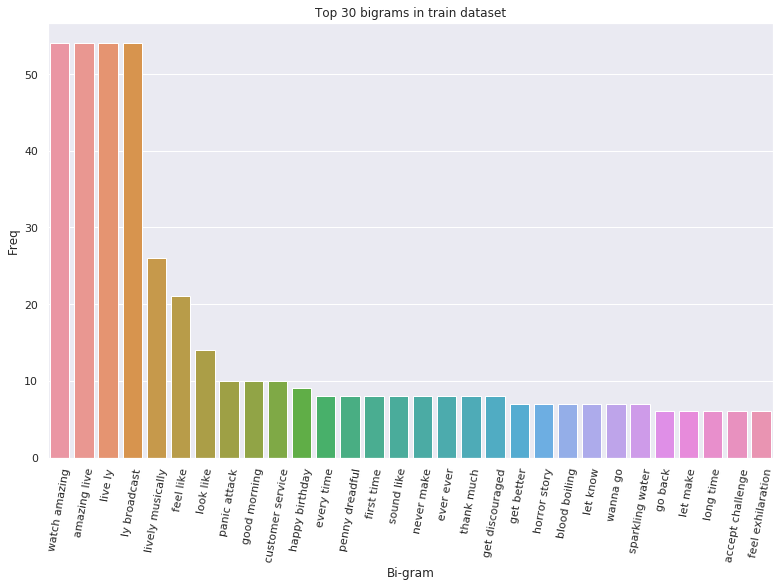

In [17]:
## plot the top 30 bigrams in train dataset
train_top2_words = get_top_n2_words(train_corpus, n=30)
train_top2_df = pd.DataFrame(train_top2_words)
train_top2_df.columns=["Bi-gram", "Freq"]

# barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=train_top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=80)
h.set_title("Top 30 bigrams in train dataset")

Plot the top 30 unigrams and bigrams in our testing dataset

Text(0.5, 1.0, 'Top 30 words in test dataset')

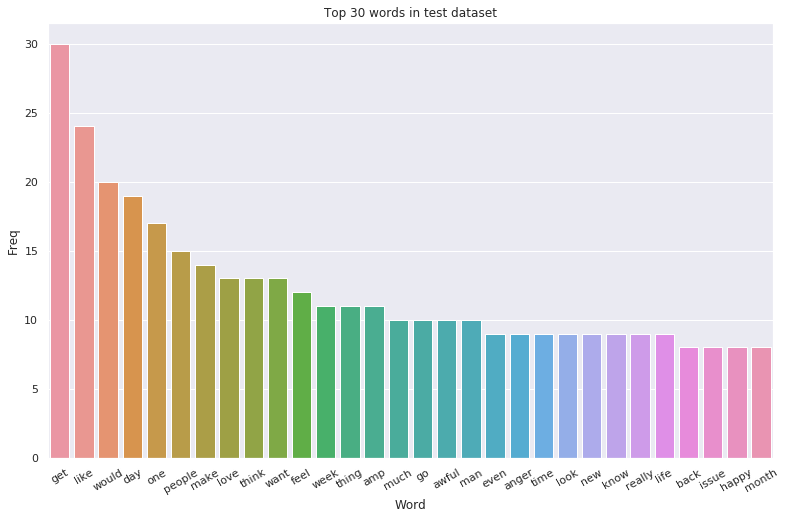

In [18]:
## plot top 30 words in test dataset
test_top_words = get_top_n_words(test_corpus, n=30)
test_top_df = pd.DataFrame(test_top_words)
test_top_df.columns=["Word", "Freq"]

# barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=test_top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set_title("Top 30 words in test dataset")

Text(0.5, 1.0, 'Top 30 bigrams in test dataset')

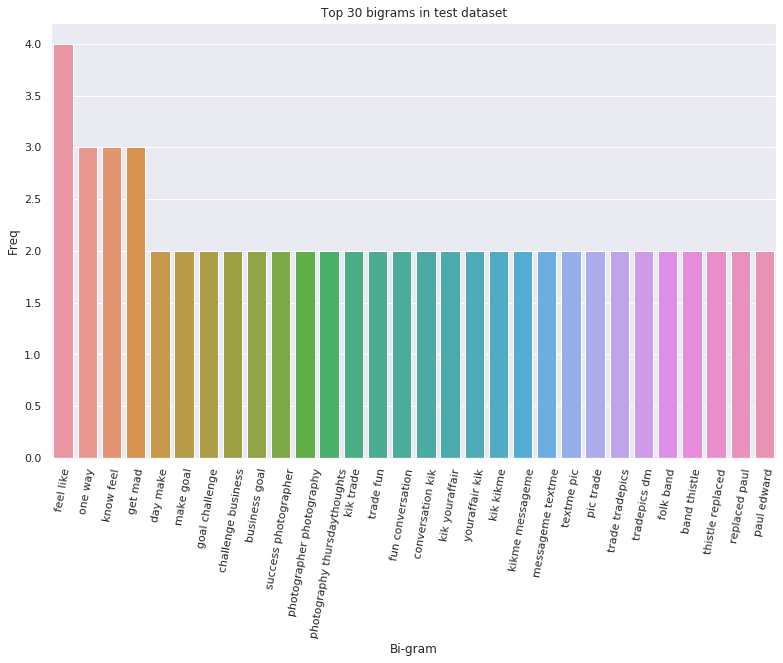

In [19]:
## plot top 30 bigrams in test dataset
test_top2_words = get_top_n2_words(test_corpus, n=30)
test_top2_df = pd.DataFrame(test_top2_words)
test_top2_df.columns=["Bi-gram", "Freq"]

# barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=test_top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=80)
h.set_title("Top 30 bigrams in test dataset")

---
### 1.2 Save data

In [0]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [0]:
## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

## 2. Feature engineering

In [0]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [23]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [24]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [25]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [27]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

In [28]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) #nltk.word_tokenize to keep the emoticons

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [31]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [3, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [32]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['cheerful',
 'cheering',
 'cheery',
 'come',
 'comes',
 'could',
 'country',
 'cry',
 'crying',
 'customer']

In [33]:
"😂" in feature_names_500

True

---
### **Exercise 2 (Take home):**  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

Embedding using TF-IDF vectorizer with 1000 features for **training dataset**

In [38]:
# import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# get training dataset corpus
train_dataset_corpus = train_df['text']

train_tfidf = TfidfVectorizer(max_features = 1000, tokenizer=nltk.word_tokenize)
train_tfidf.fit(train_dataset_corpus)

train_tfidf_features = train_tfidf.transform(train_dataset_corpus)
print (train_tfidf_features.shape)

(3613, 1000)


In [39]:
train_tfidf_features.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41443328, 0.08551062, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12655035, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.70538728, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.08257592, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.09289078, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [40]:
# observe some feature names in train dataset
train_feature_names_1000 = train_tfidf.get_feature_names()
train_feature_names_1000[100:110]

['awesome', 'awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc']

In [41]:
"😂" in train_feature_names_1000

True

Embedding using TF-IDF vectorizer with 1000 features for **testing dataset**

In [42]:
# get testing dataset corpus
test_dataset_corpus = test_df['text']

test_tfidf = TfidfVectorizer(max_features = 1000, tokenizer=nltk.word_tokenize) 
test_tfidf.fit(test_dataset_corpus)

test_tfidf_features = test_tfidf.transform(test_dataset_corpus)
print (test_tfidf_features.shape)

(347, 1000)


In [43]:
test_tfidf_features.toarray()

array([[0.10508628, 0.59162399, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13769001, 0.29069225, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.54252493, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.4822067 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.08938212, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22211117, 0.15630763, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [44]:
# observe some feature names in test dataset
test_feature_names_1000 = test_tfidf.get_feature_names()
test_feature_names_1000[100:110]

['amp',
 'an',
 'and',
 'android',
 'anger',
 'angry',
 'angryman',
 'animated',
 'another',
 'answers']

In [45]:
"😂" in test_feature_names_1000

True

---
## 3. Model
### 3.1 Decision Trees

In [46]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [47]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'sadness', 'anger', 'sadness', 'sadness', 'fear', 'anger',
       'fear', 'sadness', 'anger'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [48]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.66


In [49]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.70      0.68      0.69        84
        fear       0.68      0.68      0.68       110
         joy       0.62      0.67      0.65        79
     sadness       0.63      0.59      0.61        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [50]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 11  7  9]
 [11 75 14 10]
 [ 6 13 53  7]
 [ 7 12 11 44]]


In [0]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

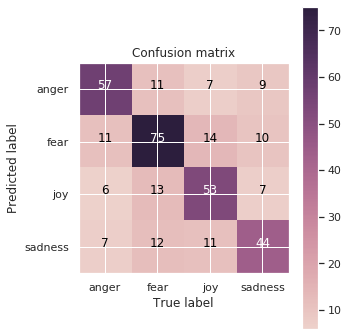

In [52]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
###**Exercise 3 (Take home):**  
Can you interpret the results above? What do they mean?

The Confusion Matrix can be seen as a "table" that describes the performance of a classification model.

The confusion matrix function is available in the sklearn metrics module and  in this particular case the function will return a 4x4 numpy array since there are 4 different classes (emotions) in the dataset.

The diagonal values represent the points where the predicted labels are equal to the true labels, in a multiclass classification the diagonal values are the True Positives (TP) for each class.

Taking class "fear" as an example, we can see that its TP = 75 and from all the true values from this particular class 11 were misclassified as "anger", 13 as "joy" and 12 as "sadness".

The same applies for the other three classes, in this particular confusion matrix the columns represent the true labels and the rows the actual predicted labels.


---
### **Exercise 4 (Take home):**  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [53]:
# import the classifier
from sklearn.naive_bayes import MultinomialNB

# Init the Multinomial Classifier
NB_model = MultinomialNB()

# Train the model 
NB_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [54]:
## predict using Naive Bayes classifier
nb_y_train_pred = NB_model.predict(X_train)
nb_y_test_pred = NB_model.predict(X_test)

## see predicted result
nb_y_test_pred[:10]

array(['fear', 'sadness', 'joy', 'fear', 'sadness', 'joy', 'fear', 'fear',
       'sadness', 'anger'], dtype='<U7')

In [55]:
## Naive Bayes classifier accuracy
from sklearn.metrics import accuracy_score

nb_acc_train = accuracy_score(y_true=y_train, y_pred=nb_y_train_pred)
nb_acc_test = accuracy_score(y_true=y_test, y_pred=nb_y_test_pred)

print('MultinomialNB training accuracy: {}'.format(round(nb_acc_train, 2)))
print('MultinomialNB testing accuracy: {}'.format(round(nb_acc_test, 2)))

MultinomialNB training accuracy: 0.79
MultinomialNB testing accuracy: 0.71


In [56]:
## Naive Bayes classifier precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=nb_y_test_pred))

              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.81      0.77       110
         joy       0.74      0.70      0.72        79
     sadness       0.65      0.65      0.65        74

    accuracy                           0.71       347
   macro avg       0.71      0.70      0.70       347
weighted avg       0.71      0.71      0.71       347



In [57]:
## check Naive Bayes classifier by confusion matrix
from sklearn.metrics import confusion_matrix

nb_cm = confusion_matrix(y_true=y_test, y_pred=nb_y_test_pred) 
print(nb_cm)

[[55 13  6 10]
 [ 7 89  5  9]
 [ 9  8 55  7]
 [ 7 11  8 48]]


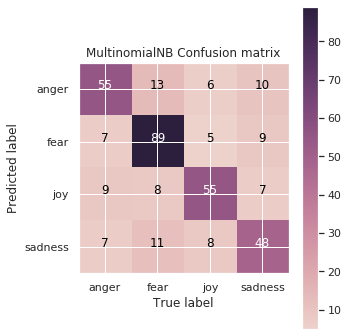

In [58]:
## plot Multinomial Naive Bayes classifier confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(nb_cm, classes=my_tags, title='MultinomialNB Confusion matrix')

---
### **Exercise 5 (Take home):**  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

We can see that the Decision Tree model has a training accuracy of 0.99, it does not look very normal and it may be a sign of overfitting, this can be happening because decision trees tend to overfit the training data more than other techniques.

As decision trees use the "divide and conquer" method, they tend to perform well if a few highly relevant attributes exist, but less so if many complex interactions are present.

For example, the decision tree model may have problems when identifying between "fear" and "sadness" where attributes may be similar. 

On the other hand, Naive Bayes classifiers assume that there are no dependencies amongst attributes. This assumption is called class conditional independence.

Since Naive Bayes classifier has this assumption, it will handle the similar attributes between classes differently using conditional probabilities leading to a better accuracy.

As a conclusion, we can see that the Naive Bayes outperform the Decision Tree model, there is a significant precision improvement in all classes, and a higher accuracy prediction for the "fear" label can be observed.

---

## 5. Other things you can try

---
## 6. Deep Learning

### 6.1 Prepare data (X, y)

In [59]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

Using TensorFlow backend.


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)


In [60]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3426    sadness
1930       fear
2823        joy
291       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [61]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [62]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()






Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax_1 (Softmax)          (None, 4)                

### 6.4 Train

In [63]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 3613 samples, validate on 347 samples
Epoch 1/25





3613/3613 [==============================] - 10s 3ms/step - loss: 1.3254 - acc: 0.3712 - val_loss: 1.2800 - val_acc: 0.4438
Epoch 2/25
3613/3613 [==============================] - 0s 102us/step - loss: 0.9898 - acc: 0.6443 - val_loss: 0.9310 - val_acc: 0.6398
Epoch 3/25
3613/3613 [==============================] - 0s 104us/step - loss: 0.5724 - acc: 0.7971 - val_loss: 0.7446 - val_acc: 0.7349
Epoch 4/25
3613/3613 [==============================] - 0s 108us/step - loss: 0.4120 - acc: 0.8505 - val_loss: 0.7494 - val_acc: 0.7205
Epoch 5/25
3613/3613 [==============================] - 0s 103us/step - loss: 0.3243 - acc: 0.8854 - val_loss: 0.7752 - val_acc: 0.7176
Epoch 6/25
3613/3613 [==============================] - 0s 104us/step - loss: 0.2638 - acc: 0.9134 - val_loss: 0.8541 - val_acc: 0.7003
Epoch 7/25
3613/3613 [==============

### 6.5 Predict on testing data

In [64]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[9.6948305e-03, 8.0743504e-01, 1.8251453e-01, 3.5555643e-04],
       [4.8387694e-05, 1.6139589e-02, 5.4042521e-06, 9.8380661e-01],
       [9.8902136e-01, 1.1095771e-03, 9.0010287e-03, 8.6807110e-04],
       [1.1839886e-02, 9.6990269e-01, 3.4768425e-05, 1.8222703e-02],
       [8.0903874e-08, 3.1237738e-07, 2.0196381e-08, 9.9999964e-01]],
      dtype=float32)

In [65]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'sadness', 'anger', 'fear', 'sadness'], dtype=object)

In [66]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [67]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,acc,loss,val_acc,val_loss
0,0,0.371160,1.325446,0.443804,1.279993
1,1,0.644340,0.989826,0.639769,0.930981
2,2,0.797122,0.572367,0.734870,0.744588
3,3,0.850540,0.412043,0.720461,0.749428
4,4,0.885414,0.324349,0.717579,0.775190
5,5,0.913368,0.263762,0.700288,0.854091
6,6,0.929145,0.220685,0.685879,0.883118
7,7,0.944368,0.180245,0.682997,0.963183
8,8,0.954608,0.158487,0.691643,1.005947
9,9,0.957653,0.146880,0.680115,1.058303


---
### **Exercise 6 (Take home)**  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

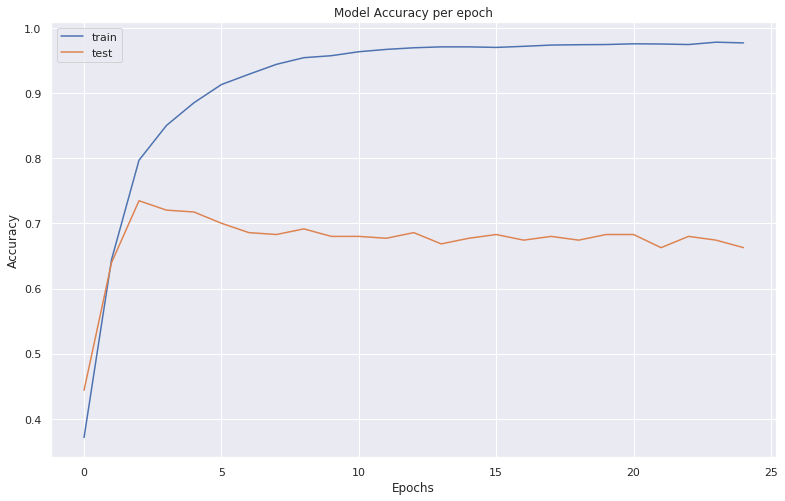

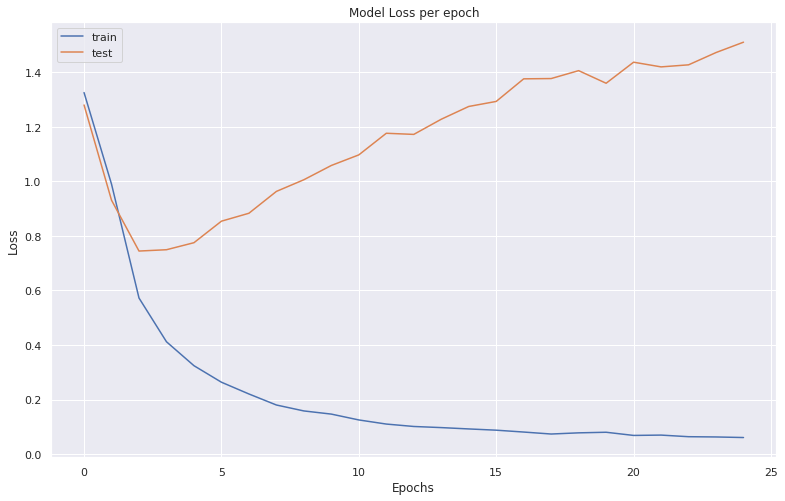

In [68]:
# Answer here
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

By examining the two graphs we can observe two important concepts.

In the model accuracy graph, we can see how both training and testing accuracy were increasing before the 3rd. epoch whereas by looking at the model loss graph we see that both were decreasing, this is referred as **underfitting**.

**Underfitting** refers to the situation when the model does not have enough variables to solve the training dataset, in this particular case, before the 3rd. epoch the model is still learning.


After the 3rd. epoch training accuracy continues to increase until reaching almost a 100%, while testing accuracy remains up and down between 65% to 70%; training loss keep decreasing while testing loss is increasing, it is referred as **overfitting**; the model is more and more overfitting after the 3rd. epoch.

When **overfitting** occurs, the model becomes too specialized on solving for the training data and start to perform worst when validated on the test data. We can say that the model memorizes the answers in the training dataset and does not generalize to the test dataset.

---

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [69]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3426,40599,In the name of our Lord &amp; Saviour Harambe ...,"[In, the, name, of, our, Lord, &, amp, ;, Savi..."
1930,21073,@CurtisJobling Yes indeed! We know masses of s...,"[@, CurtisJobling, Yes, indeed, !, We, know, m..."
2823,30819,Quinn's short hair makes me sad. #glee,"[Quinn, 's, short, hair, makes, me, sad, ., #,..."
291,10291,#Anger or #wrath is an intense emotional respo...,"[#, Anger, or, #, wrath, is, an, intense, emot..."
229,10229,"Absolutely raging at the changes to CAS, what ...","[Absolutely, raging, at, the, changes, to, CAS..."


In [70]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['In', 'the', 'name', 'of', 'our', 'Lord', '&', 'amp', ';', 'Saviour', 'Harambe', 'we', 'pray', ',', 'bless', 'all', 'apes', 'across', 'the', 'world.\\n\\nHear', 'our', 'solemn', 'oaths', 'and', 'pardon', 'sympathetic', 'hominids', '.']),
       list(['@', 'CurtisJobling', 'Yes', 'indeed', '!', 'We', 'know', 'masses', 'of', 'students', 'would', 'be', 'so', 'excited', 'to', 'see', 'you', '!', 'We', 'need', 'to', 'get', 'this', 'sorted', '!', '#', 'haunt']),
       list(['Quinn', "'s", 'short', 'hair', 'makes', 'me', 'sad', '.', '#', 'glee'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [71]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3426,40599,In the name of our Lord &amp; Saviour Harambe ...,"[In, the, name, of, our, Lord, &, amp, ;, Savi..."
1930,21073,@CurtisJobling Yes indeed! We know masses of s...,"[@, CurtisJobling, Yes, indeed, !, We, know, m..."
2823,30819,Quinn's short hair makes me sad. #glee,"[Quinn, 's, short, hair, makes, me, sad, ., #,..."
291,10291,#Anger or #wrath is an intense emotional respo...,"[#, Anger, or, #, wrath, is, an, intense, emot..."
229,10229,"Absolutely raging at the changes to CAS, what ...","[Absolutely, raging, at, the, changes, to, CAS..."


In [0]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

### 7.3 Generating word vector (embeddings)

In [73]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.04041276, -0.1918746 , -0.9682201 , -0.21147393,  0.92060524,
       -0.4026021 , -0.29531407, -0.31464028, -0.63961256, -0.487199  ,
        0.32297   ,  0.71242183, -0.10985801,  0.95463943,  0.18527041,
        0.24657618, -0.38768658,  0.63205594, -0.66789424,  1.4989871 ,
        0.24216737, -0.5649304 ,  0.16999869, -0.8194692 , -0.7290914 ,
        0.0530362 ,  0.3465062 , -0.97945267,  0.27666974, -0.08239856,
        0.35049424, -0.19130848,  0.53392774, -0.19534309, -0.5876677 ,
        0.10050367, -0.11053739,  0.22420332, -0.04379639, -0.41395292,
       -0.6348293 , -0.6039398 ,  0.3806367 , -0.0847119 , -0.33335266,
       -1.1814201 ,  0.01057406,  0.05836435,  0.46462867,  0.2740415 ,
        0.81804425,  0.08762516,  1.0639433 , -0.28763008,  0.29591826,
        0.6048924 ,  0.6332513 , -0.3556587 , -0.2321096 , -0.12963614,
        0.36963755,  0.25045812, -0.02699079,  0.22245565,  0.32629108,
        0.11361297, -0.1988731 ,  0.14763118, -0.46001908, -0.40

In [74]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[('blessed', 0.9701354503631592),
 ('establishment', 0.9456602334976196),
 ('trusted', 0.9385294318199158),
 ('PUSSY\\nP', 0.9323575496673584),
 ("'how", 0.9300866723060608),
 ('Be', 0.9290618300437927),
 ('birthday', 0.9267907738685608),
 ('Makes', 0.9261031150817871),
 ("'you", 0.9260380268096924),
 ('cats', 0.9246522784233093)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [75]:
# download google word2vec pretrained embedding
!wget "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2019-12-21 19:02:35--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.102.117
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.102.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  17.1MB/s    in 95s     

2019-12-21 19:04:11 (16.4 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [76]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [77]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.9336150288581848),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084257125854),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323126792908),
 ('wish', 0.9013165831565857)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [78]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

---
### **Exercise 7 (Take home):**  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


We can try two different simple approaches:

**Average of Word2Vec vectors:** Take the average of all vectors in a sentence, then this average vector will represent the sentence vector.

**Average of Word2Vec vectors with TF-IDF:** This approach can be better than just averaging all vectors, we take the word vectors and multiply it with their TF-IDF scores, then we just take the average and it will represent our sentence vector.

These are just two simple approaches, depending on our model we can try other options. We can also use these vectors with models that accept a sequence as an input.


### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [79]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [80]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


In [81]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [82]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)


## 9. High-dimension Visualization: t-SNE

### 9.1 Prepare visualizing target

Let's repare data lists like:
    - happpy words
    - angry words
    - data words
    - mining words

In [83]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.1 Plot using t-SNE (2-dimension)

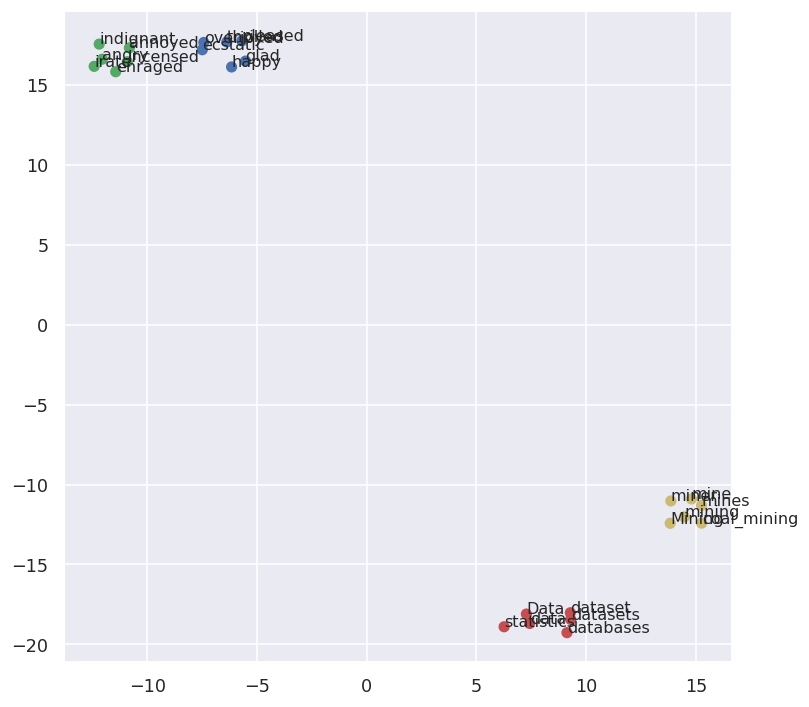

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### **Exercise 8 (Take home):**  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

blue: angry words
green: happy words
red: sad words
yellow: fear words


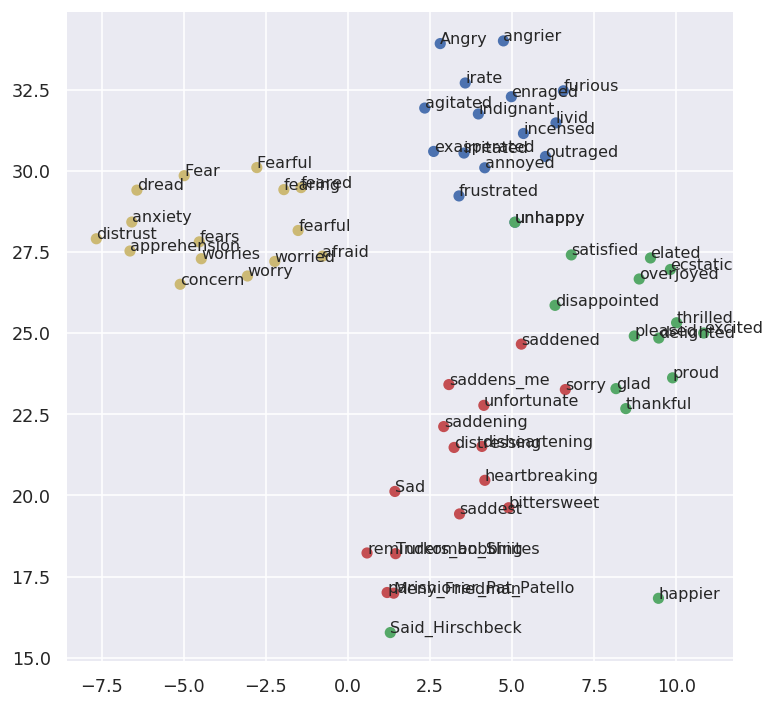

In [103]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words =  [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]     
happy_words =  [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words =  [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words =  [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

target_words = angry_words + happy_words + sad_words + fear_words

cn = topn
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn


## w2v model
model = w2v_google_model

## prepare training word vectors
size = 300
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')

print('blue: angry words')
print('green: happy words')
print('red: sad words')
print('yellow: fear words')

plt.show()


Noticed that some words are mistaken such as the case of "unhappy" and "disappointed" wich are in the happy words.